In [1]:
%matplotlib inline

# this library is for loading data and manipulating it
import pandas as pd

# import models
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# get a helper function for splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

# get a function for measuring test error
from sklearn.metrics import mean_absolute_error

# for manipulating arrays
import numpy as np

# for visualising data
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.losses import MeanAbsoluteError

In [2]:
#Load
data_train = pd.read_excel("train.xlsx")
data_test = pd.read_excel("test.xlsx")

In [3]:
Xdata_Train = data_train.drop(columns = ["Date","High","Low","Open","Close next day",\
                                              "Volume","Adj Close","change % of close",\
                                              "diff","gain","loss","avg_gain","avg_loss",\
                                              "rs","Close next day"])
print(Xdata_Train)
Xdata_Train = np.array(Xdata_Train)

Ydata_Train = np.array(data_train["Close next day"])

Xdata_Test = data_test.drop(columns = ["Date","High","Low","Open","Close next day",\
                                              "Volume","Adj Close","change % of close",\
                                              "diff","gain","loss","avg_gain","avg_loss",\
                                              "rs","Close next day"])
Xdata_Test = np.array(Xdata_Test)

Ydata_Test = np.array(data_test["Close next day"])

model_data = dict()

           Close        rsi  5-day moving average  20-day moving average  \
0     143.000000  45.098170            146.340002             144.880001   
1     144.600006  49.769887            146.140002             144.960001   
2     142.300003  43.976862            145.100003             144.895001   
3     137.399994  34.708082            142.960001             144.640001   
4     138.000000  36.473695            141.060001             144.375001   
...          ...        ...                   ...                    ...   
1229  132.199997  45.728574            132.539999             135.540001   
1230  133.300003  49.617954            132.300000             135.325001   
1231  133.399994  49.968947            132.439999             135.240000   
1232  134.600006  54.101614            133.020001             135.305000   
1233  133.800003  51.072810            133.460001             135.220000   

          MACD    Signal  Histogram  Upper Bollinger Band  \
0     0.862974  0.870529  

# Random Forest

Error of Random Forest regression model: 1.4862630573844144


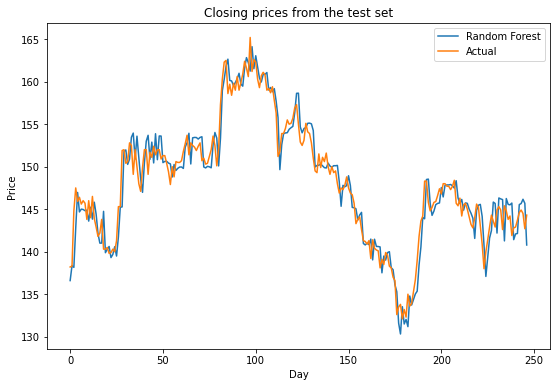

In [4]:
model = RandomForestRegressor()
model.fit(Xdata_Train, Ydata_Train)

# use the model to make predictions on the test set
y_pred = model.predict(Xdata_Test)

# calculate MAE and store predictions for comparing all models' predictions on one graph
model_name = "Random Forest"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

# KNN

Error of kNN regression model: 2.5966798851847175


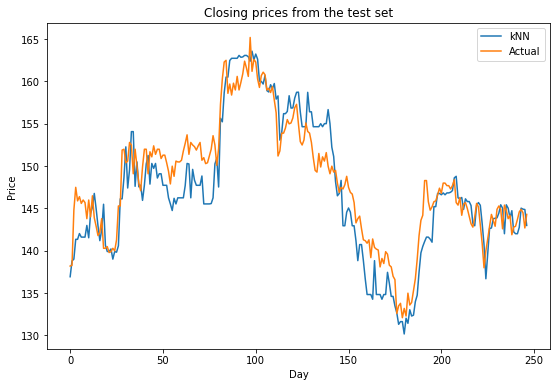

In [5]:
model = KNeighborsRegressor()
model.fit(Xdata_Train, Ydata_Train)

# get predictions
y_pred = model.predict(Xdata_Test)

# calculate MAE
model_name = "kNN"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

# SVM

Error of SVM regression model: 1.4927431039227765


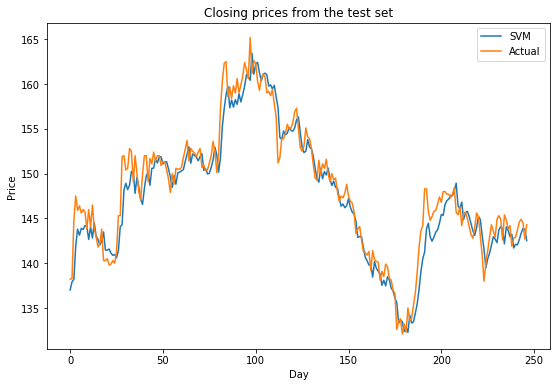

In [6]:
model = SVR()
model.fit(Xdata_Train, Ydata_Train)

# get predictions
y_pred = model.predict(Xdata_Test)

# calculate error
model_name = "SVM"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

# MLP

Error of MLP regression model: 1.3450095760234502


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


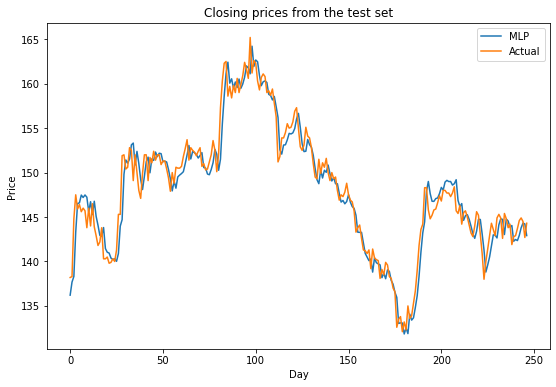

In [7]:
model = MLPRegressor() #hidden_layer_sizes default=(100,)
model.fit(Xdata_Train, Ydata_Train)

# get predictions
y_pred = model.predict(Xdata_Test)

# calculate error
model_name = "MLP"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

Error of MLP(tensorFlow) regression model: 1.3328437805175781


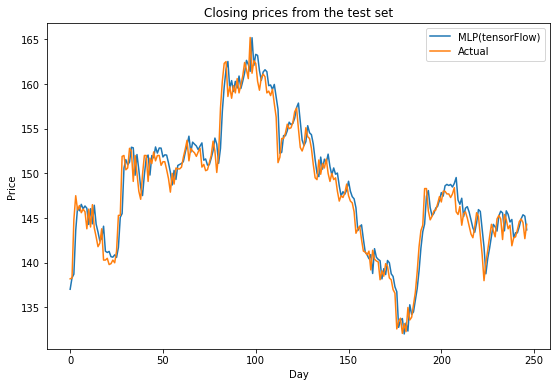

In [8]:
model = Sequential()
model.add(Dense(256, activation='ReLU'))
model.add(Dense(64, activation='ReLU'))
model.add(Dense(32, activation='ReLU'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')

model.fit(Xdata_Train, Ydata_Train, batch_size=64, epochs=500, verbose=0)
mae = MeanAbsoluteError()

# get predictions
y_pred = model.predict(Xdata_Test)
y_pred = y_pred.reshape(y_pred.shape[0])


# calculate error
model_name = "MLP(tensorFlow)"
model_data[model_name] = {
    "error": mae(y_pred, Ydata_Test).numpy(), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])



# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()